In [83]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import math
import csv

main_df = pd.read_csv("s208 - Sheet1.csv")

In [84]:
id = []
for i in range(len(main_df)):
    id.append(i)
main_df["ID"] = id

In [85]:
num_of_peaks = 50
main_df.head()

,Signal1,Signal2,ID
0,32,0,0
1,8,0,1
2,7,0,2
3,0,0,3
4,9,1,4


In [88]:
len(main_df)

40819

In [89]:
len(main_df)

40819

In [90]:
avg = main_df["Signal1"].mean()
print("Average1 :",avg)
avg2 = main_df["Signal2"].mean()
print("Average2:",avg2)

Average1 : 23.9143291114432
Average2: 2.7076116514368307


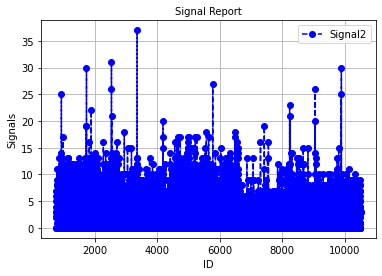

In [91]:
import csv
  
x = []
y1 = []
y2 = []
  
for i in range(754,10508):
    x.append(main_df["ID"][i])
    y1.append(main_df["Signal1"][i])
    y2.append(main_df["Signal2"][i])

  
  
plt.plot(x, y2, color = 'b', linestyle = 'dashed',
         marker = 'o',label = "Signal2")
  
plt.xlabel('ID')
plt.ylabel('Signals')
plt.title('Signal Report', fontsize = 10)
plt.grid()
plt.legend()
plt.show()


In [92]:
for i in range(len(main_df)):
    if(main_df.at[i,'Signal1']<avg and main_df.at[i,'Signal2']<avg2):
        main_df = main_df.drop(index = i)
        #print(i)

In [93]:
id = []
for i in range(len(main_df)):
    id.append(i)
main_df["ID"] = id

In [94]:
main_df.set_index("ID", inplace = True)
main_df.head()


,Signal1,Signal2
ID,,
0,32,0
1,31,3
2,30,0
3,28,0
4,24,0


In [95]:
len(main_df)

23026

Saving the raw data in a file

main_df.to_csv("f051ff_raw.csv")

In [96]:
limit = int(len(main_df)/num_of_peaks)
rms_id = []
rms_values = []
mean_values = []
kurtosis_values = []
sd_values = []
skew_values = []
rms_values2 = []
mean_values2 = []
kurtosis_values2 = []
sd_values2 = []
skew_values2 = []

In [97]:
for i in range(num_of_peaks):
    rms_id.append(i)  

In [98]:
from scipy import stats
from scipy.stats import kurtosis
for i in range(num_of_peaks):
    val = 0
    mean = 0
    val2 = 0
    mean2 = 0
    part_data_s1 = []
    part_data_s2 = []
    for j in range(limit):
        val = val + (main_df.at[i+j, 'Signal1'])*(main_df.at[i+j, 'Signal1'])
        mean = mean + (main_df.at[i+j, 'Signal1']) 
        val2 = val2 + (main_df.at[i+j, 'Signal2'])*(main_df.at[i+j, 'Signal2'])
        mean2 = mean2 + (main_df.at[i+j, 'Signal2']) 
        part_data_s1.append(main_df.at[i+j, 'Signal1'])
        part_data_s2.append(main_df.at[i+j, 'Signal2'])
    val = val/limit
    mean = mean/limit
    val2 = val2/limit
    mean2 = mean2/limit
    val = math.sqrt(val)
    val2 = math.sqrt(val)
    rms_values.append(val) 
    rms_values2.append(val2)
    mean_values.append(mean)
    mean_values2.append(mean2)
    kurtosis_values.append(kurtosis(part_data_s1)) 
    kurtosis_values2.append(kurtosis(part_data_s2))
    sd_values.append(stats.tstd(part_data_s1))
    sd_values2.append(stats.tstd(part_data_s2))
    skew_values.append(stats.skew(part_data_s1))
    skew_values2.append(stats.skew(part_data_s2))

In [99]:
print(rms_id) 
print(len(rms_id)) 
print(rms_values) 
print(len(rms_values))  
print(rms_values2) 
print(len(rms_values2)) 

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]
50
[38.141441572355276, 38.20158202961256, 38.209092930985626, 38.18692583002494, 38.18239976970951, 38.23155991995414, 38.29936428124919, 38.31843125589882, 38.33655310989534, 38.317012908900786, 38.356820152013555, 38.41798152360202, 38.37177971192983, 38.35622504887571, 38.408558828786425, 38.44632056799963, 38.40510609167801, 38.39182997325931, 38.43673514615481, 38.45709071272756, 38.50513799707661, 38.587957121135716, 38.5649367667845, 38.56282282649736, 38.57251781300752, 38.617578786147995, 38.574743933890446, 38.61023180453596, 38.63367533079421, 38.64281810769432, 38.69479236953907, 38.68670145625261, 38.66250289925347, 38.65125567452358, 38.727139119070316, 38.760131915241935, 38.77053453108542, 38.79273239869192, 38.7904627453708, 38.79956857671397, 38.82821699206144, 38.89324854789962,

In [100]:
print(rms_values2) 
print(len(rms_values2))  

[6.17587577371463, 6.180742838010053, 6.1813504132176185, 6.179557090117782, 6.179190866910449, 6.183167466594621, 6.188648017236817, 6.190188305366713, 6.191651888623531, 6.190073740182808, 6.193288314943327, 6.198224062068265, 6.19449592072913, 6.193240270559161, 6.1974639029837375, 6.200509702274453, 6.197185336237574, 6.196114102666228, 6.199736699744176, 6.201378130119753, 6.205250840786101, 6.21192056622875, 6.210067372161473, 6.20989716714354, 6.210677725740366, 6.214304368644007, 6.210856940381935, 6.213713205848493, 6.215599354108517, 6.21633478085715, 6.220513834848298, 6.219863459614898, 6.217917891002861, 6.217013404724457, 6.2231132979458375, 6.225763560820627, 6.22659895376966, 6.228381202101548, 6.228198996930879, 6.228929970445484, 6.231229171845747, 6.23644518519161, 6.234811121160902, 6.236646832437374, 6.23824811327902, 6.239360445398878, 6.2435448236430515, 6.244455687776047, 6.243169646041668, 6.24202359563495]
50


In [101]:
data = {'ID': rms_id,
        'rms':rms_values,
        'mean': mean_values,
        'kurtosis':kurtosis_values,
        'SD': sd_values,
        'skewness':skew_values,
        'rms2':rms_values2,
        'mean2': mean_values2,
        'kurtosis2':kurtosis_values2,
        'SD2': sd_values2,   
        'skewness2':skew_values2
       }
df = pd.DataFrame(data)

In [102]:
df.to_csv("s208_50.csv")